In [1]:
# import sys
# sys.path.insert(0, '../../src')

import quik_ai as qa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras

from importlib.metadata import version 
print('Quik-AI Version: %s' % version('quik_ai'))

Quik-AI Version: 1.3.1


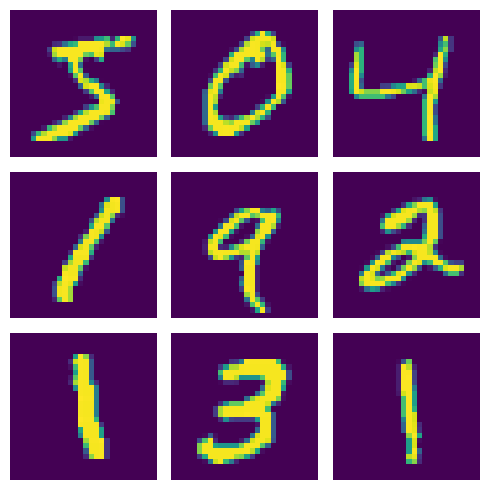

In [2]:
# fetch the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# make the training and test sets
training_data = pd.DataFrame({
    'X' : list(x_train),
    'y' : y_train
})

testing_data = pd.DataFrame({
    'X' : list(x_test),
    'y' : y_test
})

# plot a sample of digits
fig, axes = plt.subplots(3, 3, figsize=(5, 5))

for i, ax in enumerate(axes.flatten()):
    # Plot the image
    img = training_data['X'].iloc[i]
    ax.imshow(img, vmin=0, vmax=255)

    # Remove the axes
    ax.axis('off')

# Adjust the space between plots if needed
plt.tight_layout()
plt.show()

In [3]:
# create the driver, this will generate the tensorflow dataset and feed data
driver = qa.Driver(training_data, testing_data, testing_data, batch_size=256)

# what does our response look like?
head = qa.heads.Logistic(event_size=len(training_data.y.unique()))

# all the predictors for the model
predictors = [
    qa.predictors.Image('X', height=qa.tuning.HyperChoice([-1, 7, 14])),
]

# what is our model architecture? This will store
# our model, driver, and any other information we use in training
# testing, saving, and loading needed for this problem
model = qa.models.ResNet('y', head, predictors, driver)

# train the model, we can provide a hyperparameter tuner and other
# training parameters, by default we will use a custom BOHB tuner
model.train(tuner_params={'max_epochs' : 10})

Trial 30 Complete [00h 00m 22s]
val_sparse_categorical_crossentropy: 0.2683711647987366

Best val_sparse_categorical_crossentropy So Far: 0.0783018171787262
Total elapsed time: 00h 09m 47s
INFO:tensorflow:Oracle triggered exit
Round 1 best score: 0.0736


In [4]:
# evaluate the model on test data
model.evaluate()

40/40 [==============================] - 0s 6ms/step - loss: 0.0736 - sparse_categorical_crossentropy: 0.0736 - sparse_categorical_accuracy: 0.9786


{'loss': 0.07362065464258194,
 'sparse_categorical_crossentropy': 0.07362065464258194,
 'sparse_categorical_accuracy': 0.978600025177002}

In [5]:
# save the model to disk and reload the model
# then test on the test data once again
model.save()
model = qa.HyperModel.load()

# evaluate again, this should be the same score as before
model.evaluate()

INFO:tensorflow:Assets written to: ./model\tf_model\assets


INFO:tensorflow:Assets written to: ./model\tf_model\assets


40/40 [==============================] - 1s 6ms/step - loss: 0.0736 - sparse_categorical_crossentropy: 0.0736 - sparse_categorical_accuracy: 0.9786


{'loss': 0.07362065464258194,
 'sparse_categorical_crossentropy': 0.07362065464258194,
 'sparse_categorical_accuracy': 0.978600025177002}

In [6]:
model.instance.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X (InputLayer)              [(None, 28, 28)]          0         
                                                                 
 tf.identity_3 (TFOpLambda)  (None, 28, 28)            0         
                                                                 
 rescaling_1 (Rescaling)     (None, 28, 28)            0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 28, 28, 1)        0         
 a)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        272       
                                                                 
 feature_flatten_1 (FeatureF  (None, 100, 16)          0         
 latten)                                                   

In [7]:
results = pd.DataFrame({
    'prediction' : model.predict(testing_data, verbose=0).argmax(axis=1),
    'target' : testing_data.y,
})

results

,prediction,target
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5
